In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['figure.figsize'] = (7 , 5)
plt.style.use('dark_background')

   feature_1  feature_2  target
0  -1.006572  -2.276529     0.0
1  -0.704623   1.046060     0.0
2  -2.468307  -2.468274     0.0
3   1.158426  -0.465131     0.0
4  -2.938949  -0.914880     0.0


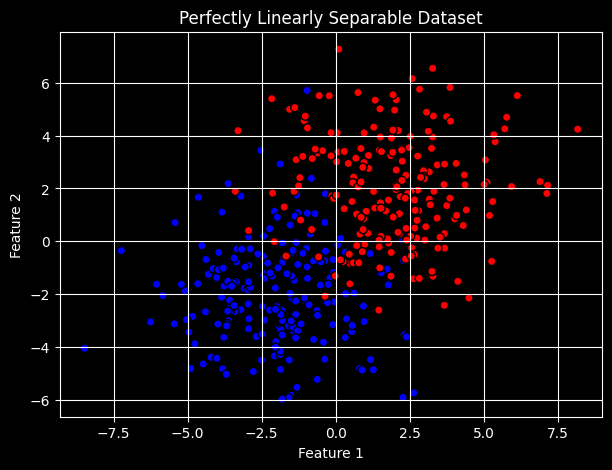

In [49]:
# Set random seed for reproducibility
np.random.seed(42)

# Class 0: centered at (-2, -2)
class0 = np.random.randn(200, 2) * 2 + np.array([-2, -2])
y0 = np.zeros(200)

# Class 1: centered at (2, 2)
class1 = np.random.randn(200, 2) * 2 + np.array([2, 2])
y1 = np.ones(200)

# Combine the data
xtrain = np.vstack([class0, class1])
ytrain = np.concatenate([y0, y1])

# Put into a DataFrame (optional)
df = pd.DataFrame(xtrain, columns=["feature_1", "feature_2"])
df["target"] = ytrain

print(df.head())

# Plot
plt.figure(figsize=(7,5))
plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain, cmap='bwr', edgecolor='k')
plt.title("Perfectly Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [94]:
class LogisticRegression():
    def __init__(self):
        self.w = None
        self.bias = None

    def fit(self , x , y , niter , lr):
        n , m = x.shape
        self.w = np.zeros((m , 1))
        y = y.reshape((n , 1))
        # self.bias = np.zeros

        for iter in range(niter):
            z = x @ self.w
            ypred = 1 / (1 + np.exp(-z))
            dw = np.mean(-(x.T @ (ypred - y)) , axis = 0)

            if iter == 0:
                print(f"{ypred.shape=}")
                print(f"{(ypred - y).shape=}")
                print(f"{x.shape=}")
                print(f"{dw.shape=}")
                # break

            self.w += lr * dw

        return np.round(self.w , 4)
    
lr = LogisticRegression()

lr.fit(xtrain , ytrain , 1000 , 0.1)

ypred.shape=(400, 1)
(ypred - y).shape=(400, 1)
x.shape=(400, 2)
dw.shape=(1,)


array([[1.6895],
       [1.6895]])

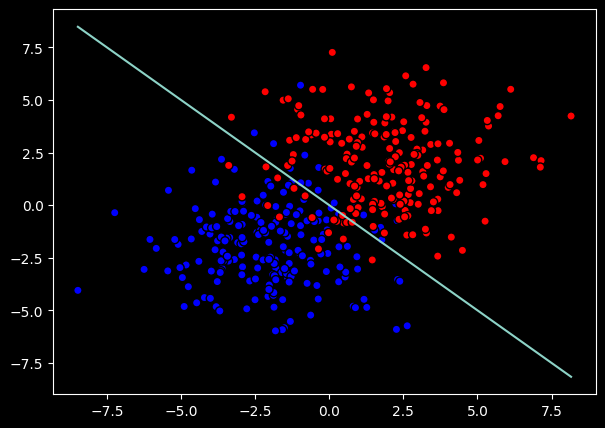

In [96]:
#plot the weight line:
plt.figure(figsize=(7,5))
plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain, cmap='bwr', edgecolor='k')
x1 = np.linspace(min(xtrain[:, 0]) , max(xtrain[: , 0]) , 100)
x2 = -(lr.w[0] * x1) / lr.w[1]
plt.plot(x1 , x2)